In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt

from chip_analysis.box_filter import BoxFilter

In [3]:
data = Path.cwd().parent / "data"
examples = list(data.iterdir())

In [43]:
bf = BoxFilter(examples[3])

In [5]:
bf.filter()

Commencing image processing...
  1/5 - Removing outliers...
  2/5 - Black-white filtering...
  3/5 - Culling boundary pixel...
  4/5 - Removing pixel islands...
  5/5 - Aspect ratio filter...


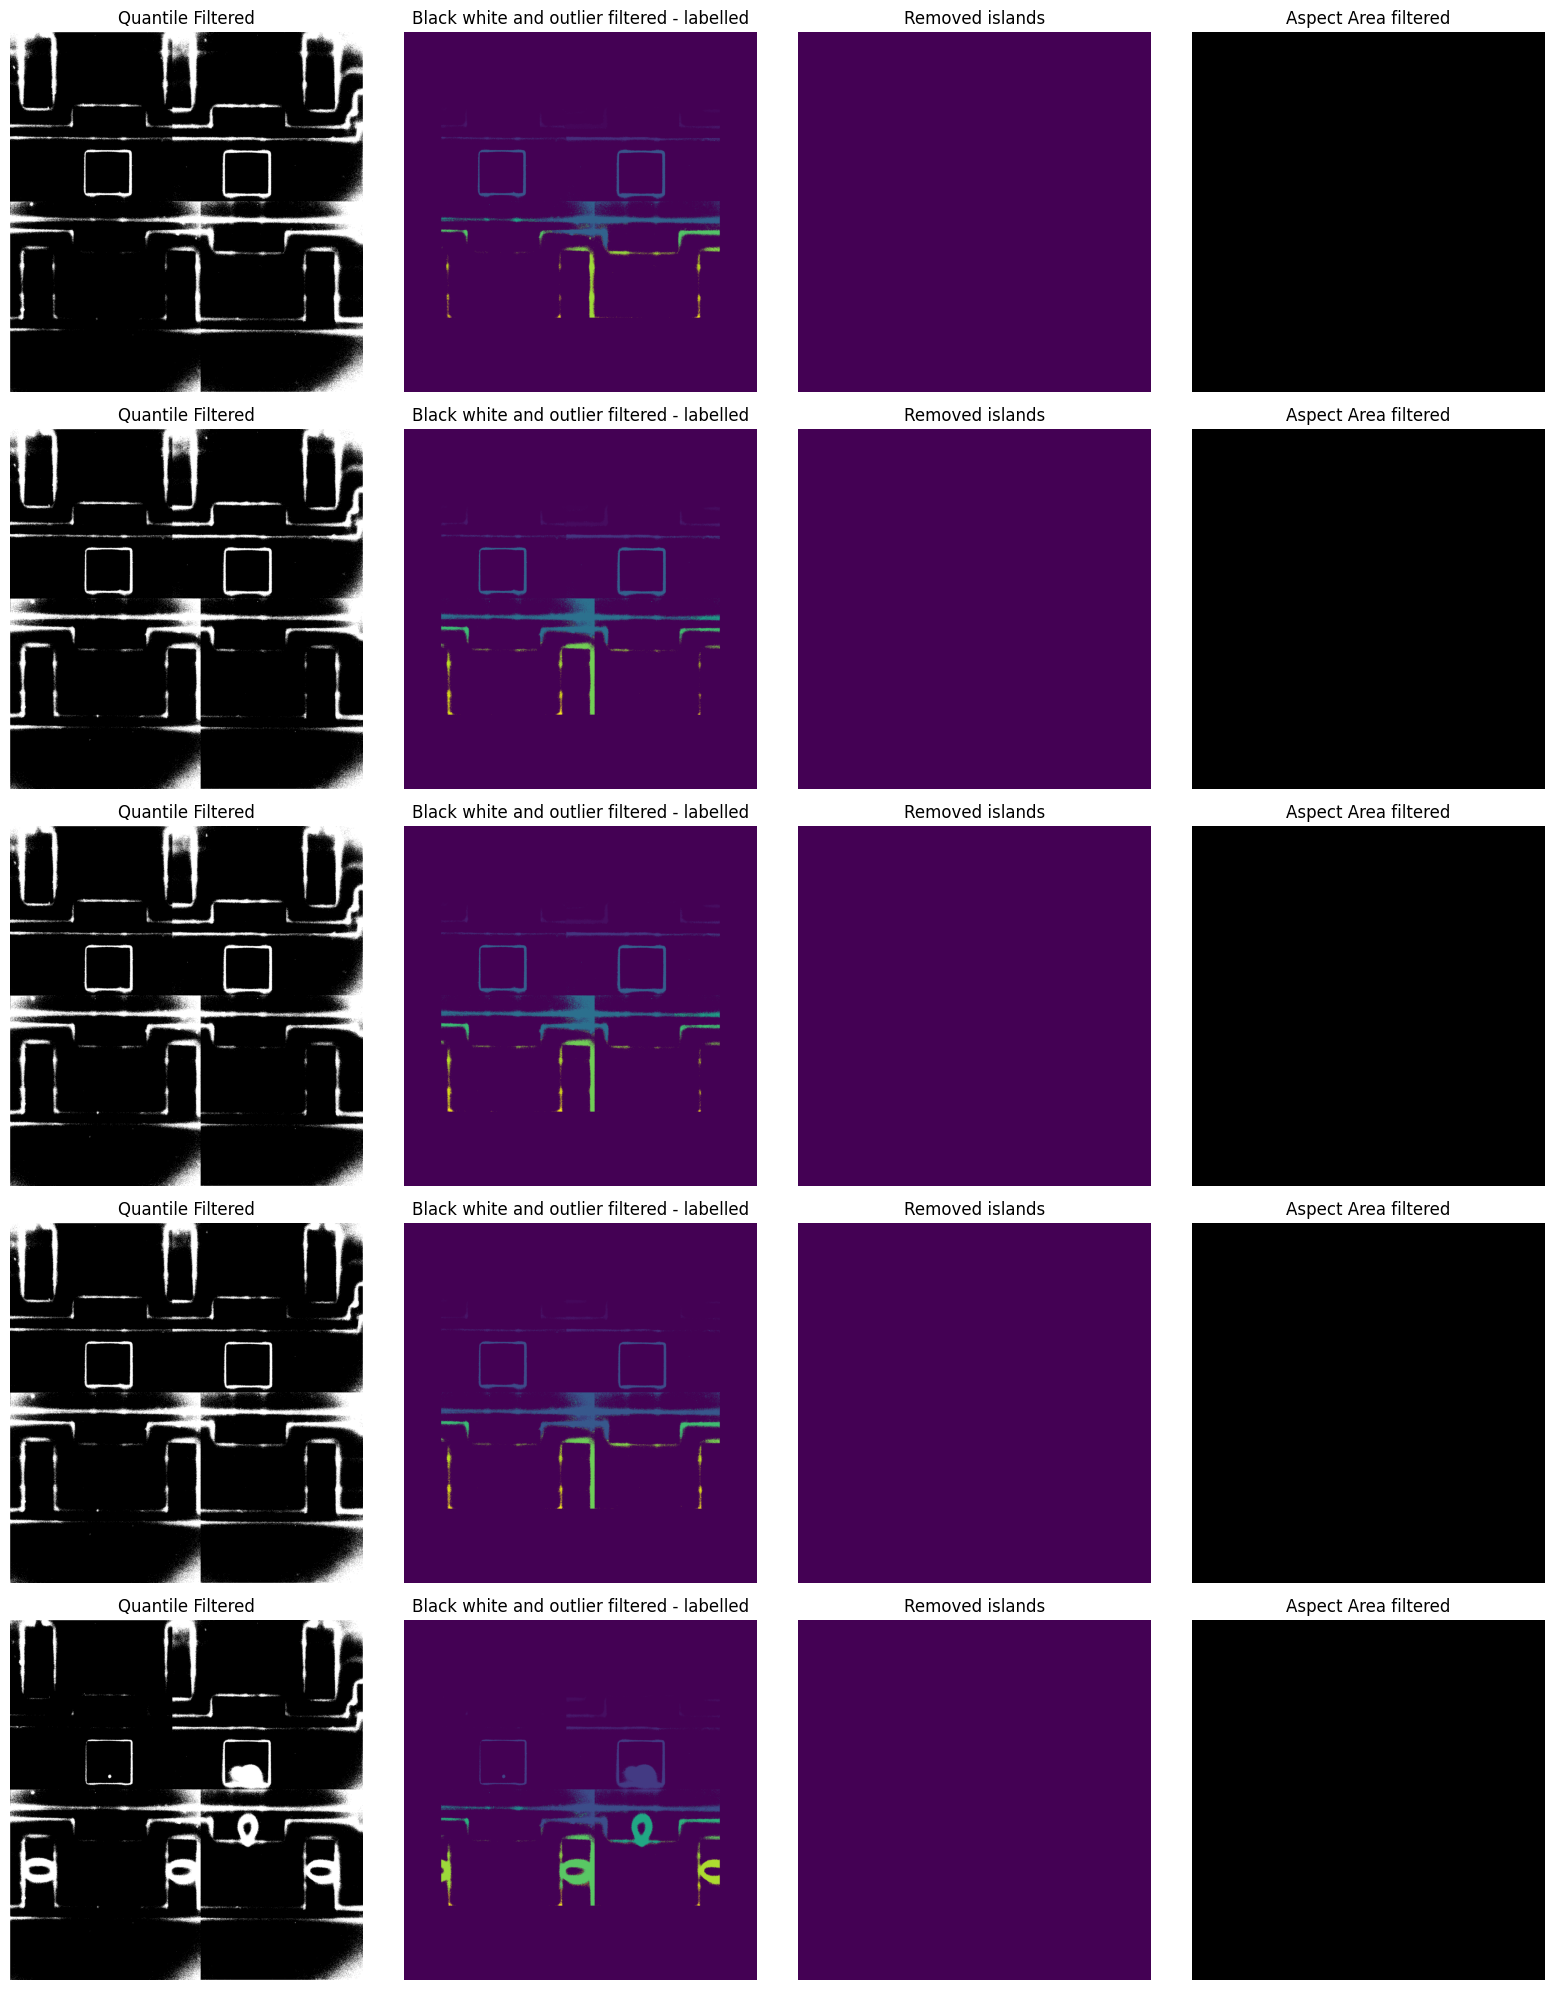

In [6]:
bf.visualise()

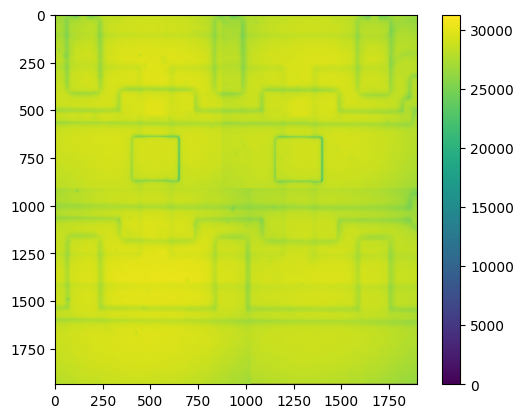

In [8]:
plt.imshow(bf.imgs[0,:,:])
plt.colorbar()

# Development

In [7]:
import numpy as np
import scipy.ndimage as nd

np.uint16(0)

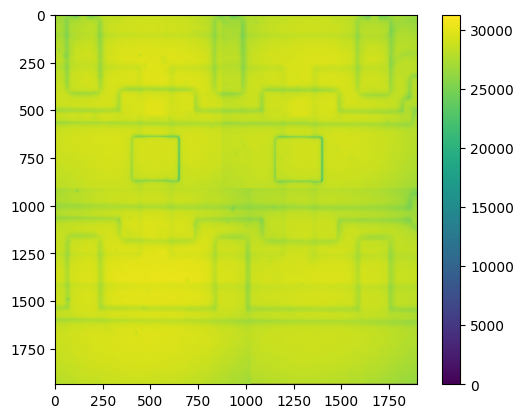

In [ ]:
img = bf.imgs[0,:,:]
plt.imshow(img)
plt.colorbar()

np.float64(27364.0)

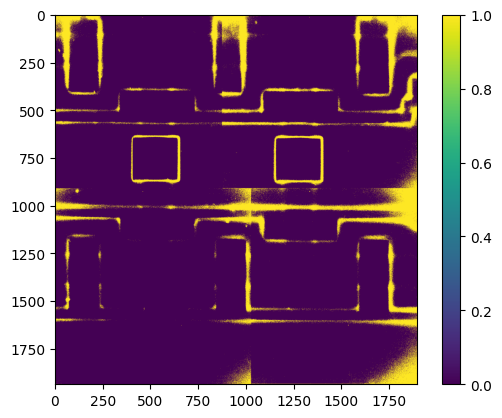

In [56]:
bf = BoxFilter(examples[3])
img = bf.imgs[0,:,:]
threshold = np.quantile(img, 0.1)
img[img < threshold] = 0
img[img > 0] = 1
img = 1 - img
# plt.imshow(img[750:1000,1000:1250])
plt.imshow(img)
plt.colorbar()
threshold

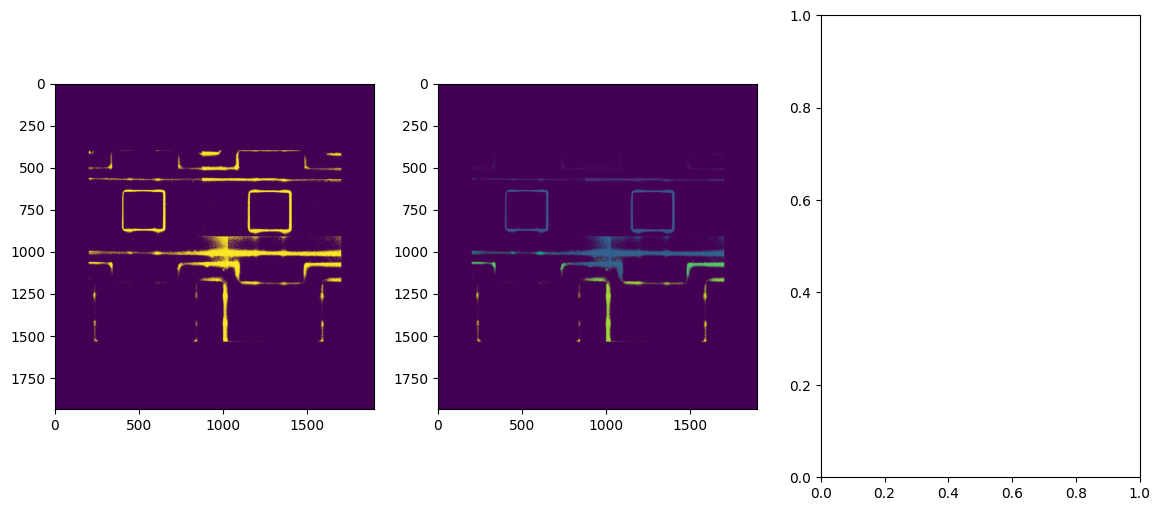

In [10]:
_, axes = plt.subplots(1, 3, figsize=(14, 6)) 

img = np.copy(bf._2_culled[0,:,:])
tSmall, tLarge = bf.config.pixelSizeThresholds
s = nd.generate_binary_structure(2,2)
labelled, nLabels = nd.label(img)#, structure=s)

axes[0].imshow(img)

axes[1].imshow(labelled)

test = nd.labeled_comprehension(img, labelled, nLabels, lambda x: x.size, float, 0)
# axes[2].imshow(img)
# axes[2].colorbar()

plt.show()